In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport

import matplotlib 
from matplotlib import pyplot as plt
from matplotlib import style
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image


#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   
import warnings
warnings.filterwarnings('ignore')


#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_excel("fakenews.xlsx")
df

Unnamed: 0     id                                           headline  \
0              0   9653  Ethics Questions Dogged Agriculture Nominee as...   
1              1  10041  U.S. Must Dig Deep to Stop Argentinaâ€™s Lione...   
2              2  19113  Cotton to House: â€™Do Not Walk the Plank and ...   
3              3   6868  Paul LePage, Besieged Maine Governor, Sends Co...   
4              4   7596                       A Digital 9/11 If Trump Wins   
...          ...    ...                                                ...   
25111      20795   5671                                                NaN   
25112      20796  14831        Albert Pike and the European Migrant Crisis   
25113      20797  18142  Dakota Access Caught Infiltrating Protests to ...   
25114      20798  12139  How to Stretch the Summer Solstice - The New Y...   
25115      20799  15660  Emory University to Pay for â€™100 Percentâ€™ ...   

                       written_by  \
0      Eric Lipton and Steve Eder   
1                 David Waldstein   
2                         Pam Key   
3                    Jess Bidgood   
4               Finian Cunningham   
...                           ...   
25111              NeverSurrender   
25112               Rixon Stewart   
25113                 Eddy Lavine   
25114              Alison S. Cohn   
25115                Tom Ciccotta   

                                                    news label Unnamed: 6  \
0      WASHINGTON  â€”   In Sonny Perdueâ€™s telling,...     0        NaN   
1      HOUSTON  â€”   Venezuela had a plan. It was a ...     0        NaN   
2      Sunday on ABCâ€™s â€œThis Week,â€ while discu...     0        NaN   
3      AUGUSTA, Me.  â€”   The beleaguered Republican...     0        NaN   
4        Finian Cunningham has written extensively on...     1        NaN   
...                                                  ...   ...        ...   
25111  No, you'll be a dog licking of the vomit of yo...     1        NaN   
25112  By Rixon Stewart on November 5, 2016 Rixon Ste...     1        NaN   
25113  posted by Eddie You know the Dakota Access Pip...     1        NaN   
25114  Itâ€™s officially summer, and the Society Bout...     0        NaN   
25115  Emory University in Atlanta, Georgia, has anno...     0        NaN   

      Unnamed: 7 Unnamed: 8 Unnamed: 9  ... Unnamed: 676 Unnamed: 677  \
0            NaN        NaN        NaN  ...          NaN          NaN   
1            NaN        NaN        NaN  ...          NaN          NaN   
2            NaN        NaN        NaN  ...          NaN          NaN   
3            NaN        NaN        NaN  ...          NaN          NaN   
4            NaN        NaN        NaN  ...          NaN          NaN   
...          ...        ...        ...  ...          ...          ...   
25111        NaN        NaN        NaN  ...          NaN          NaN   
25112        NaN        NaN        NaN  ...          NaN          NaN   
25113        NaN        NaN        NaN  ...          NaN          NaN   
25114        NaN        NaN        NaN  ...          NaN          NaN   
25115        NaN        NaN        NaN  ...          NaN          NaN   

      Unnamed: 678 Unnamed: 679 Unnamed: 680 Unnamed: 681 Unnamed: 682  \
0              NaN          NaN          NaN          NaN          NaN   
1              NaN          NaN          NaN          NaN          NaN   
2              NaN          NaN          NaN          NaN          NaN   
3              NaN          NaN          NaN          NaN          NaN   
4              NaN          NaN          NaN          NaN          NaN   
...            ...          ...          ...          ...          ...   
25111          NaN          NaN          NaN          NaN          NaN   
25112          NaN          NaN          NaN          NaN          NaN   
25113          NaN          NaN          NaN          NaN          NaN   
25114          NaN          NaN          NaN          NaN          NaN   
25115   

In [3]:
df1= df[["id","headline","written_by","news","label"]]

In [7]:
df1['label'] = df1['label'].astype(str)

<ipython-input-7-d9510ea99578>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['label'] = df1['label'].astype(str)


In [4]:
df1

id                                           headline  \
0       9653  Ethics Questions Dogged Agriculture Nominee as...   
1      10041  U.S. Must Dig Deep to Stop Argentinaâ€™s Lione...   
2      19113  Cotton to House: â€™Do Not Walk the Plank and ...   
3       6868  Paul LePage, Besieged Maine Governor, Sends Co...   
4       7596                       A Digital 9/11 If Trump Wins   
...      ...                                                ...   
25111   5671                                                NaN   
25112  14831        Albert Pike and the European Migrant Crisis   
25113  18142  Dakota Access Caught Infiltrating Protests to ...   
25114  12139  How to Stretch the Summer Solstice - The New Y...   
25115  15660  Emory University to Pay for â€™100 Percentâ€™ ...   

                       written_by  \
0      Eric Lipton and Steve Eder   
1                 David Waldstein   
2                         Pam Key   
3                    Jess Bidgood   
4               Finian Cunningham   
...                           ...   
25111              NeverSurrender   
25112               Rixon Stewart   
25113                 Eddy Lavine   
25114              Alison S. Cohn   
25115                Tom Ciccotta   

                                                    news label  
0      WASHINGTON  â€”   In Sonny Perdueâ€™s telling,...     0  
1      HOUSTON  â€”   Venezuela had a plan. It was a ...     0  
2      Sunday on ABCâ€™s â€œThis Week,â€ while discu...     0  
3      AUGUSTA, Me.  â€”   The beleaguered Republican...     0  
4        Finian Cunningham has written extensively on...     1  
...                                                  ...   ...  
25111  No, you'll be a dog licking of the vomit of yo...     1  
25112  By Rixon Stewart on November 5, 2016 Rixon Ste...     1  
25113  posted by Eddie You know the Dakota Access Pip...     1  
25114  Itâ€™s officially summer, and the Society Bout...     0  
25115  Emory University in Atlanta, Georgia, has anno...     0  

[25116 rows x 5 columns]

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25116 entries, 0 to 25115
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          23424 non-null  object
 1   headline    21973 non-null  object
 2   written_by  20119 non-null  object
 3   news        21715 non-null  object
 4   label       25116 non-null  object
dtypes: object(5)
memory usage: 981.2+ KB


In [9]:
df1.label.value_counts()

1                                                                                                                                                                                                          10371
0                                                                                                                                                                                                          10350
nan                                                                                                                                                                                                         3654
 Arizona in the USA.                                                                                                                                                                                           2
 the well of wisdom and understanding.                                                                                                                              

In [10]:
def text_clean_1(text):
    text = re.sub('[^0-1]','', text)    #removing all except english letters 
    
    return text

cleaned1 = lambda x: text_clean_1(x)
df1['label'] = pd.DataFrame(df1.label.apply(cleaned1))

<ipython-input-10-8d0b5992d6f6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['label'] = pd.DataFrame(df1.label.apply(cleaned1))


In [11]:
print(df1.label.value_counts(),'\n')
print("Number of Unique Values",df1.label.nunique())

1        10382
0        10354
          4358
000          4
00           4
10           3
11           2
01           2
100          1
0000         1
111          1
1011         1
0010         1
0001         1
00110        1
Name: label, dtype: int64 

Number of Unique Values 15


In [5]:
#Holding only 1's and 0's from label column
df_new = (df1[(df1['label'] == 1) | (df1['label'] == 0)])

In [6]:
df_new.label.value_counts()

1    10371
0    10350
Name: label, dtype: int64

In [7]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20721 entries, 0 to 25115
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          20721 non-null  object
 1   headline    20163 non-null  object
 2   written_by  18769 non-null  object
 3   news        20682 non-null  object
 4   label       20721 non-null  object
dtypes: object(5)
memory usage: 971.3+ KB


In [8]:
df_new.written_by.nunique()

4164

In [9]:
#Filling Null writers as Unknown 
df_new.written_by.fillna("Unknown",inplace = True)

In [10]:
#droping the rows where news is Null
df_new.dropna(subset=['news'],axis=0,inplace=True)

In [11]:
#Filling Null Values in Headline as Unknown
df_new.headline.fillna("Unknown",inplace = True)

In [12]:
df_new.reset_index(drop=True,inplace=True)  #Resetting Index

In [13]:
#Fake News Dataframe
df_fake = df_new.loc[df_new['label'] == 1]

In [14]:
df_real = df_new.loc[df_new['label'] == 0]

In [56]:
df_fake

id                                           headline  \
4       7596                       A Digital 9/11 If Trump Wins   
5       3196  Whatever the Outcome on November 8th the US Wi...   
7       1504  Alabama Prison Officials Retaliate Against Pri...   
8      13559                                            Unknown   
9       4203           Can We Live in a Constant State of Love?   
...      ...                                                ...   
20673   5895        Putin: No difference between Clinton, Trump   
20674   7244                       REUTERS TO CUT 2,000 JOBSâ€¦   
20677   5671                                            Unknown   
20678  14831        Albert Pike and the European Migrant Crisis   
20679  18142  Dakota Access Caught Infiltrating Protests to ...   

              written_by                                               news  \
4      Finian Cunningham    Finian Cunningham has written extensively on...   
5                Unknown  Taming the corporate media beast Whatever the ...   
7       Brian Sonenstein  Advocates say prison officials at the Kilby Co...   
8            steventexas  People have made up their minds on president.\...   
9                Gillian  Leave a reply \nToni Emerson â€“ When we fall ...   
...                  ...                                                ...   
20673             Editor  Russian President Vladimir Putin has responded...   
20674          newsguy76  Warning : array_key_exists() expects parameter...   
20677     NeverSurrender  No, you'll be a dog licking of the vomit of yo...   
20678      Rixon Stewart  By Rixon Stewart on November 5, 2016 Rixon Ste...   
20679        Eddy Lavine  posted by Eddie You know the Dakota Access Pip...   

      label  
4         1  
5         1  
7         1  
8         1  
9         1  
...     ...  
20673     1  
20674     1  
20677     1  
20678     1  
20679     1  

[10332 rows x 5 columns]

Unknown                                  18.3%
admin                                     1.9%
Pakalert                                  0.8%
Eddy Lavine                               0.8%
Starkman                                  0.8%
Alex Ansary                               0.8%
Editor                                    0.8%
Gillian                                   0.8%
noreply@blogger.com (Alexander Light)     0.8%
Dave Hodges                               0.7%
Anonymous                                 0.7%
IWB                                       0.7%
BareNakedIslam                            0.7%
The European Union Times                  0.7%
Activist Post                             0.7%
The Doc                                   0.7%
EdJenner                                  0.7%
Mac Slavo                                 0.6%
Henry Wolff                               0.6%
Iron Sheik                                0.6%
Name: written_by, dtype: object


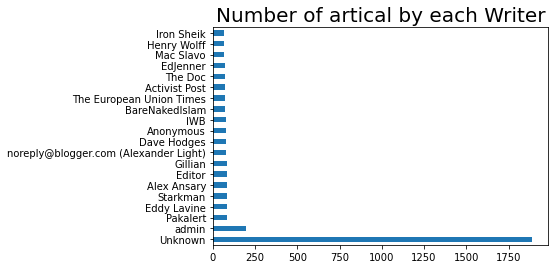

In [93]:
df_fake["written_by"].value_counts()[:20].plot(kind='barh')
percent100 = df_fake.written_by.value_counts(normalize=True)[:20].mul(100).round(1).astype(str) + '%'
plt.title("Number of artical by each Writer", fontsize=20)
print(percent100)

Text(0.5, 1.0, 'Number of artical with no headlines')

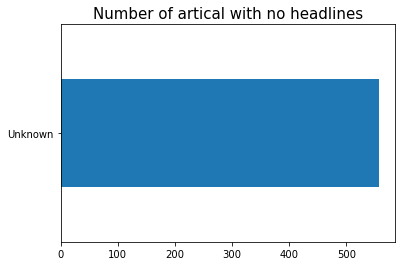

In [95]:
df_fake["headline"].value_counts()[0:1].plot(kind='barh')
plt.title("Number of artical with no headlines", fontsize=15)

In [106]:
print('Number of artical with Uknown headlines in Real News:',(df_real['headline']=='Uknown').sum())

Number of artical with Uknown headlines in Real News: 0


Pam Key                2.3%
Jerome Hudson          1.6%
Charlie Spiering       1.4%
John Hayward           1.4%
Katherine Rodriguez    1.2%
Warner Todd Huston     1.2%
Ian Hanchett           1.1%
Breitbart News         1.1%
Daniel Nussbaum        1.1%
AWR Hawkins            1.0%
Jeff Poor              1.0%
Joel B. Pollak         1.0%
Trent Baker            1.0%
Breitbart London       0.9%
Bob Price              0.9%
Ben Kew                0.9%
Charlie Nash           0.9%
Lucas Nolan            0.8%
Breitbart Jerusalem    0.7%
John Binder            0.7%
Name: written_by, dtype: object


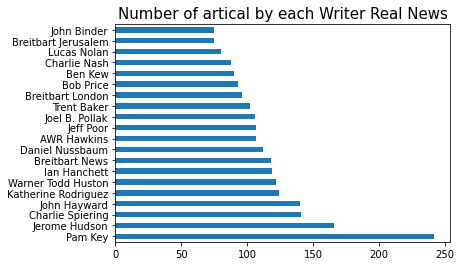

In [97]:
df_real["written_by"].value_counts()[:20].plot(kind='barh')
percent100 = df_real.written_by.value_counts(normalize=True)[:20].mul(100).round(1).astype(str) + '%'
plt.title("Number of artical by each Writer Real News", fontsize=15)
print(percent100)

In [92]:
from functools import reduce
print('List of Common Writers in Real and Fake News:','\n',list(reduce(set.intersection, map(set, [df_fake.written_by, df_real.written_by]))))

List of Common Writers in Real and Fake News: 
 ['AFP', 'Pam Key', 'Ann Coulter', 'Reuters', 'Pamela Geller', 'Unknown']


In [15]:
df_new['headline'] = df_new['headline'].astype(str)
df_new['news'] = df_new['news'].astype(str)
df_new['written_by'] = df_new['written_by'].astype(str)


In [16]:
#This function converts to lower-case, removes square bracket, removes numbers,
#Url's HTML tages and punctuation
def text_clean(text):
    text = re.sub('[^a-zA-Z]', ' ', text)    #removing all except english letters 
    text = text.lower()                      #lower case 
    
    return text

cleaned = lambda x: text_clean(x)
df_new['headline'] = pd.DataFrame(df_new.headline.apply(cleaned))
df_new['news'] = pd.DataFrame(df_new.news.apply(cleaned))


In [17]:
def lower_clean(text):
    text = re.sub('[^a-zA-Z0-9]', ' ', text)
    text = text.lower()
    return text    
lower = lambda x: lower_clean(x)
df_new['written_by'] = pd.DataFrame(df_new.written_by.apply(lower))

In [45]:
df_new['label'] = df_new['label'].astype(int)

In [47]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20682 entries, 0 to 20681
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          20682 non-null  object
 1   headline    20682 non-null  object
 2   written_by  20682 non-null  object
 3   news        20682 non-null  object
 4   label       20682 non-null  int32 
dtypes: int32(1), object(4)
memory usage: 727.2+ KB


In [19]:
#Lemmatization of the comments 
stop = set(stopwords.words("english")) # importing Stopwords 
from nltk.stem import WordNetLemmatizer
def Lem_txt(text):
    text = text.split()
    ls = WordNetLemmatizer()
    text = [ls.lemmatize(w) for w in text if w not in stop]
    text = " ".join(text)
    return text

df_new.headline = df_new.headline.apply(Lem_txt)
df_new.news = df_new.news.apply(Lem_txt)
df_new.written_by = df_new.written_by.apply(Lem_txt)

In [66]:
df_new

id                                           headline  \
0       9653  ethic question dogged agriculture nominee geor...   
1      10041  u must dig deep stop argentina lionel messi ne...   
2      19113  cotton house walk plank vote bill cannot pas s...   
3       6868  paul lepage besieged maine governor sends conf...   
4       7596                                  digital trump win   
...      ...                                                ...   
20677   5671                                            unknown   
20678  14831                albert pike european migrant crisis   
20679  18142  dakota access caught infiltrating protest inci...   
20680  12139              stretch summer solstice new york time   
20681  15660  emory university pay percent undocumented stud...   

                   written_by  \
0      eric lipton steve eder   
1             david waldstein   
2                     pam key   
3                jess bidgood   
4           finian cunningham   
...                       ...   
20677          neversurrender   
20678           rixon stewart   
20679             eddy lavine   
20680             alison cohn   
20681            tom ciccotta   

                                                    news label  
0      washington sonny perdue telling georgian growi...     0  
1      houston venezuela plan tactical approach desig...     0  
2      sunday abc week discussing republican plan rep...     0  
3      augusta beleaguered republican governor maine ...     0  
4      finian cunningham written extensively internat...     1  
...                                                  ...   ...  
20677                 dog licking vomit chinese overlord     1  
20678  rixon stewart november rixon stewart nov migra...     1  
20679  posted eddie know dakota access pipeline prote...     1  
20680  officially summer society boutique society mem...     0  
20681  emory university atlanta georgia announced fun...     0  

[20682 rows x 5 columns]

In [43]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20682 entries, 0 to 20681
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          20682 non-null  object
 1   headline    20682 non-null  object
 2   written_by  20682 non-null  object
 3   news        20682 non-null  object
 4   label       20682 non-null  object
dtypes: object(5)
memory usage: 808.0+ KB


In [107]:
Fake = df_new.loc[df_new['label'] == 1]
Real = df_new.loc[df_new['label'] == 0]

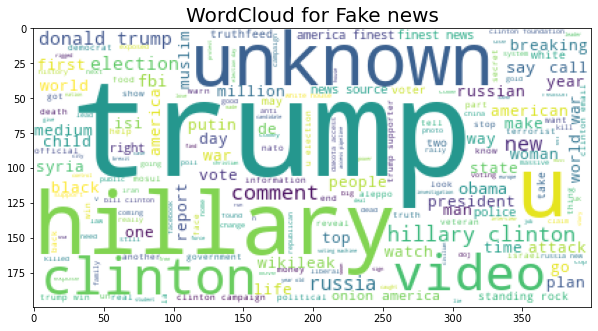

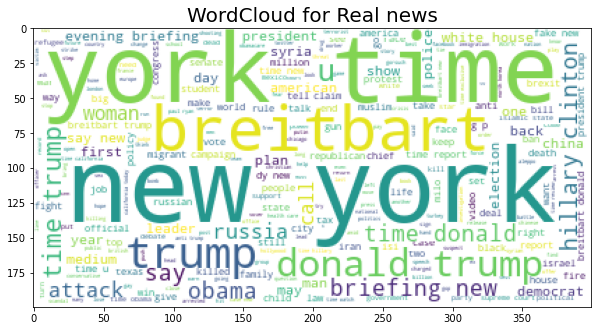

In [115]:
#Word Cloud for Fake News
subset=Fake
text=subset.headline.values
wc= WordCloud(background_color="white",max_words=2000)
wc.generate(" ".join(text))
plt.figure(figsize=(10,8))
plt.title("WordCloud for Fake news", fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

#Word Cloud for Real News 
subset=Real
text=subset.headline.values
wc= WordCloud(background_color="white",max_words=2000)
wc.generate(" ".join(text))
plt.figure(figsize=(10,8))
plt.title("WordCloud for Real news", fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

In [76]:
import keras
import keras.utils
from keras.utils.np_utils import to_categorical
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from tqdm import tqdm
import keras
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [49]:
#y=np.array(df2["Rating"].values)
y = df_new["label"]
#Combining all the words from columns
x=df_new['headline']+' '+df_new['news']+' '+df_new['written_by']

In [50]:
def split(text):
    text = text.split()     #Spliting strings into list
    return text
x = x.apply(split)

In [51]:
#Getting unique words and max length of the string

unique_words = set()
len_max = 0

for sent in tqdm(x):
    
    unique_words.update(sent)
    
    if(len_max<len(sent)):
        len_max = len(sent)
        
#length of the list of unique_words gives the no of unique words
print('Total Words:',len(list(unique_words)))
print('Max Length',len_max)

100%|█████████████████████████████████████████████████████████████████████████| 20682/20682 [00:00<00:00, 31394.66it/s]

134477
3233


In [52]:
X_train,X_val,y_train,y_val=train_test_split(x,y,test_size=0.25,random_state=15)

In [53]:
max_tokens = 70000
tokenizer = Tokenizer(num_words = max_tokens)
tokenizer.fit_on_texts(x)



# Arguments- texts: list of texts to turn to sequences.
#Return: list of sequences (one per text input).
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)


#padding done to equalize the lengths of all input reviews. LSTM networks needs all inputs to be same length.
#Therefore reviews lesser than max length will be made equal using extra zeros at end. This is padding.

X_train = sequence.pad_sequences(X_train, maxlen=1000)
X_val = sequence.pad_sequences(X_val, maxlen=1000)


print(X_train.shape,X_val.shape)

(15511, 1000) (5171, 1000)


In [54]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
#Defining the models and Training them
gnb,mnb,bnb = GaussianNB(),MultinomialNB(),BernoulliNB()

mnb = MultinomialNB(alpha=1.0,fit_prior=True)


gnb.fit(X_train,y_train)
bnb.fit(X_train,y_train)
mnb.fit(X_train,y_train)

MultinomialNB()

In [57]:
#Prediction and accuracy metrics to choose best model
ypg = gnb.predict(X_val)
ypm = mnb.predict(X_val)
ypb = bnb.predict(X_val)

print("Gaussian    = ",   accuracy_score(y_val,ypg))
print("Multinomial = ",   accuracy_score(y_val,ypm))
print("Bernoulli   = ",   accuracy_score(y_val,ypb))

Gaussian    =  0.5962096306323729
Multinomial =  0.6223167665828659
Bernoulli   =  0.6256043318507059


In [61]:
#XG Boost Classifier
from xgboost import XGBClassifier
XGB = XGBClassifier(use_label_encoder =False,eval_metric='logloss',objective ="binary:logistic")
XGB.fit(X_train,y_train)
XGBP = XGB.predict(X_val)
print("XGB    = ",   accuracy_score(y_val,XGBP))
print("Confusion Matrix For XGB" '\n', confusion_matrix(y_val, XGBP))
print(classification_report(y_val, XGBP))

XGB    =  0.902533359118159
Confusion Matrix For XGB
 [[2387  229]
 [ 275 2280]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      2616
           1       0.91      0.89      0.90      2555

    accuracy                           0.90      5171
   macro avg       0.90      0.90      0.90      5171
weighted avg       0.90      0.90      0.90      5171



In [59]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,ExtraTreesClassifier,RandomForestClassifier
models= [AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier(),RandomForestClassifier()]
names = []

for m in models:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    predm = m.predict(X_val)
    names.append(m)
    msg = "%s:" % (names)
    print(msg)
    print(accuracy_score(y_val, predm)) 
    print(confusion_matrix(y_val, predm))
    print("****************************************************************")
    print("\n")

[AdaBoostClassifier()]:
0.7981048153161864
[[2113  503]
 [ 541 2014]]
****************************************************************


[AdaBoostClassifier(), GradientBoostingClassifier()]:
0.8371688261458132
[[2365  251]
 [ 591 1964]]
****************************************************************


[AdaBoostClassifier(), GradientBoostingClassifier(), BaggingClassifier()]:
0.8340746470701992
[[2353  263]
 [ 595 1960]]
****************************************************************


[AdaBoostClassifier(), GradientBoostingClassifier(), BaggingClassifier(), ExtraTreesClassifier()]:
0.6925159543608587
[[2066  550]
 [1040 1515]]
****************************************************************


[AdaBoostClassifier(), GradientBoostingClassifier(), BaggingClassifier(), ExtraTreesClassifier(), RandomForestClassifier()]:
0.7901759814349255
[[2174  442]
 [ 643 1912]]
****************************************************************




In [34]:
 df_new["label"].nunique()

2

In [65]:
yv = df_new["label"].values

In [66]:
#Count Vectorizer with 70000 words as limit
cv = CountVectorizer(max_features = 70000)

In [67]:
xv = cv.fit_transform(df_new['headline']+' '+df_new['news']+' '+df_new['written_by'])
#x = cv.transform(df.Review_title)
print("x.shape = ",xv.shape)
print("y.shape = ",yv.shape)

x.shape =  (20682, 70000)
y.shape =  (20682,)


In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
tfidf = TfidfTransformer()

In [69]:
#Transforming the vectors into Tdifd tags 
xv = tfidf.fit_transform(xv)

In [83]:
#Spliting the Data
trainx,testx,trainy,testy=train_test_split(xv,yv,test_size=.25,random_state=15)

In [71]:
#SVC
from sklearn.svm import SVC
SVC = SVC(C=50,kernel = 'rbf', gamma = 0.01, random_state = 42)

SVC.fit(trainx,trainy)
SVCP = SVC.predict(testx)
print(accuracy_score(testy, SVCP)*100 )
print(confusion_matrix(testy, SVCP))
print(classification_report(testy, SVCP))

97.75672017017985
[[2559   57]
 [  59 2496]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2616
           1       0.98      0.98      0.98      2555

    accuracy                           0.98      5171
   macro avg       0.98      0.98      0.98      5171
weighted avg       0.98      0.98      0.98      5171



In [72]:
#LinearSVC
from sklearn.svm import LinearSVC
LinearSVC= LinearSVC(C=100)

LinearSVC.fit(trainx,trainy)
LSVC = LinearSVC.predict(testx)
print(accuracy_score(testy, LSVC)*100 )
print(confusion_matrix(testy, LSVC))
print(classification_report(testy, LSVC))

97.38928640495068
[[2544   72]
 [  63 2492]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2616
           1       0.97      0.98      0.97      2555

    accuracy                           0.97      5171
   macro avg       0.97      0.97      0.97      5171
weighted avg       0.97      0.97      0.97      5171



In [84]:
#XG Boost Classifier
from xgboost import XGBClassifier
XGB = XGBClassifier(eval_metric='auc',objective ="binary:logistic")
XGB.fit(trainx,trainy)
XGBP = XGB.predict(testx)
print("XGB    = ",   accuracy_score(testy,XGBP))
print("Confusion Matrix For XGB" '\n', confusion_matrix(testy, XGBP))
print(classification_report(testy, XGBP))

XGB    =  0.9796944498162831
Confusion Matrix For XGB
 [[2560   56]
 [  49 2506]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2616
           1       0.98      0.98      0.98      2555

    accuracy                           0.98      5171
   macro avg       0.98      0.98      0.98      5171
weighted avg       0.98      0.98      0.98      5171



0.9797075949897365

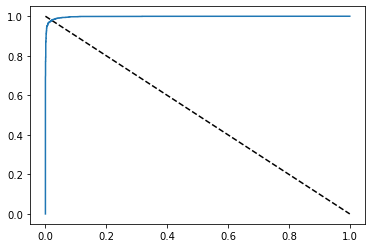

In [85]:
#Auc-Roc Curve
y_pred_rc=XGB.predict_proba(testx)[:,1]
tpr,fpr,thresholds=roc_curve(testy,y_pred_rc)
plt.plot([0,1],[1,0],"k--")
plt.plot(tpr,fpr,label="ExtraTree Classifier")
auc_score = roc_auc_score(testy,XGB.predict(testx))
auc_score

In [74]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,ExtraTreesClassifier,RandomForestClassifier
models= [AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier(),RandomForestClassifier()]
names = []

for m in models:
    m.fit(trainx,trainy)
    m.score(trainx,trainy)
    predm = m.predict(testx)
    names.append(m)
    msg = "%s:" % (names)
    print(msg)
    print(accuracy_score(testy, predm)) 
    print(confusion_matrix(testy, predm))
    print("****************************************************************")
    print("\n")

[AdaBoostClassifier()]:
0.9611293753625991
[[2520   96]
 [ 105 2450]]
****************************************************************


[AdaBoostClassifier(), GradientBoostingClassifier()]:
0.9665441887449236
[[2520   96]
 [  77 2478]]
****************************************************************


[AdaBoostClassifier(), GradientBoostingClassifier(), BaggingClassifier()]:
0.973699477857281
[[2574   42]
 [  94 2461]]
****************************************************************


[AdaBoostClassifier(), GradientBoostingClassifier(), BaggingClassifier(), ExtraTreesClassifier()]:
0.9361825565654612
[[2554   62]
 [ 268 2287]]
****************************************************************


[AdaBoostClassifier(), GradientBoostingClassifier(), BaggingClassifier(), ExtraTreesClassifier(), RandomForestClassifier()]:
0.9468187971378843
[[2530   86]
 [ 189 2366]]
****************************************************************




In [ ]:
import pickle
filename="XGBoostFakeNewsPredictions.pkl"
pickle.dump(XGB,open(filename,"wb"))

# XG Boost Classifer Has perfomed best with a 98% Accuracy and 97.97% Under the curve area 
